In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
data = pd.read_csv('Data_mining/Data/set_data.csv')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
import numpy as np
import time


X = data[['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity',
          'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age']]
y = data['Diabetes_binary']

binarizer = LabelBinarizer()
y_binary = binarizer.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

n_splits = 10
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

start_time_train = time.time()
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=0)
end_time_train = time.time()

start_time_predict = time.time()
y_pred_probs = model.predict(X_test_scaled)
y_pred = np.round(y_pred_probs)
end_time_predict = time.time()

test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)


start_time_cv = time.time()
cv_scores = []

for train_index, test_index in kf.split(X_train_scaled, y_train):
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[test_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]

    y_pred_probs_fold = model.predict(X_val_fold)
    y_pred_fold = np.round(y_pred_probs_fold)

    fold_score = accuracy_score(y_val_fold, y_pred_fold)
    cv_scores.append(fold_score)

end_time_cv = time.time()

print("Eğitim Süresi:", end_time_train - start_time_train, "saniye")
print("Tahmin Süresi:", end_time_predict - start_time_predict, "saniye")
print("Test Accuracy:", test_accuracy)
print("Çapraz Doğrulama Skorları:", cv_scores)
print("Ortalama Çapraz Doğrulama Skoru:", np.mean(cv_scores))
print("Çapraz Doğrulama Süresi:", end_time_cv - start_time_cv, "saniye")


177/177 [==============================] - 0s 1ms/step
Eğitim Süresi: 38.485310077667236 saniye
Tahmin Süresi: 2.7121782302856445 saniye
Test Accuracy: 0.7497701644897461
Çapraz Doğrulama Skorları: [0.7487623762376238, 0.7519448373408769, 0.7595473833097596, 0.7541998231653404, 0.7656940760389036, 0.7572060123784262, 0.764102564102564, 0.7607427055702918, 0.7727674624226348, 0.7612732095490716]
Ortalama Çapraz Doğrulama Skoru: 0.7596240450115492
Çapraz Doğrulama Süresi: 15.777328968048096 saniye


In [ ]:
import pandas as pd

customer_data = pd.DataFrame({
    'HighBP': [0.0],
    'HighChol': [0.0],
    'CholCheck': [1.0],
    'BMI': [26.0],
    'Smoker': [0.0],
    'Stroke': [0.0],
    'HeartDiseaseorAttack': [0.0],
    'PhysActivity': [1.0],
    'Fruits': [1.0],
    'Veggies': [1.0],
    'HvyAlcoholConsump': [0.0],
    'GenHlth': [2.0],
    'MentHlth': [0.0],
    'PhysHlth': [0.0],
    'DiffWalk': [0.0],
    'Sex': [1.0],
    'Age': [9.0]
})

predicted_diabetes_probs = model.predict(customer_data)
predicted_diabetes = (predicted_diabetes_probs > 0.5).astype(int)

print("Tahmini Diabetes Binary (Olasılıklar):", predicted_diabetes_probs)
print("Tahmini Diabetes Binary (Kategorik):", predicted_diabetes)


1/1 [==============================] - 0s 332ms/step
Tahmini Diabetes Binary (Olasılıklar): [[0.9519085]]
Tahmini Diabetes Binary (Kategorik): [[1]]


In [ ]:
from sklearn.metrics import mean_squared_error

y_pred_probs = model.predict(X_test_scaled)
y_pred = (y_pred_probs > 0.5).astype(int)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)


442/442 [==============================] - 1s 2ms/step
Mean Squared Error (MSE): 0.2502298606690714


442/442 [==============================] - 5s 11ms/step


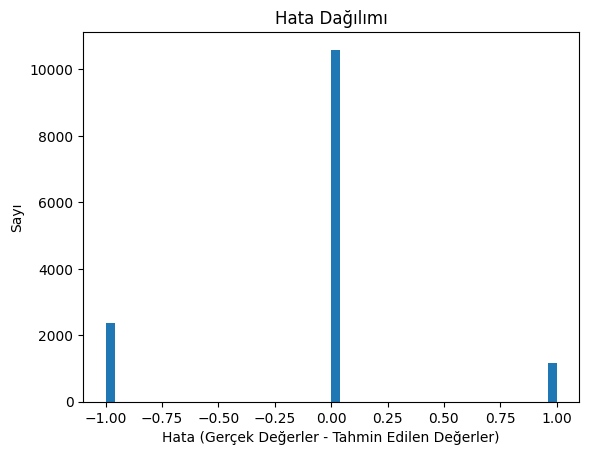

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

y_pred_probs = model.predict(X_test_scaled)
y_pred = (y_pred_probs > 0.5).astype(int)

errors = y_test - y_pred

plt.hist(errors, bins=50)
plt.xlabel("Hata (Gerçek Değerler - Tahmin Edilen Değerler)")
plt.ylabel("Sayı")
plt.title("Hata Dağılımı")
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
import numpy as np
import time


X = data[['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity',
          'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age']]
y = data['Diabetes_binary']

binarizer = LabelBinarizer()
y_binary = binarizer.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

n_splits = 10
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

start_time_train = time.time()
model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, verbose=0)
end_time_train = time.time()

start_time_predict = time.time()
y_pred_probs = model.predict(X_test_scaled)
y_pred = np.round(y_pred_probs)
end_time_predict = time.time()

test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)


start_time_cv = time.time()
cv_scores = []

for train_index, test_index in kf.split(X_train_scaled, y_train):
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[test_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]

    y_pred_probs_fold = model.predict(X_val_fold)
    y_pred_fold = np.round(y_pred_probs_fold)

    fold_score = accuracy_score(y_val_fold, y_pred_fold)
    cv_scores.append(fold_score)

end_time_cv = time.time()

print("Eğitim Süresi:", end_time_train - start_time_train, "saniye")
print("Tahmin Süresi:", end_time_predict - start_time_predict, "saniye")
print("Test Accuracy:", test_accuracy)
print("Çapraz Doğrulama Skorları:", cv_scores)
print("Ortalama Çapraz Doğrulama Skoru:", np.mean(cv_scores))
print("Çapraz Doğrulama Süresi:", end_time_cv - start_time_cv, "saniye")


177/177 [==============================] - 0s 1ms/step
Eğitim Süresi: 73.51842045783997 saniye
Tahmin Süresi: 3.0390870571136475 saniye
Test Accuracy: 0.7451022267341614
Çapraz Doğrulama Skorları: [0.7675035360678925, 0.7692715700141443, 0.7735148514851485, 0.7694076038903626, 0.7759504862953139, 0.7704686118479221, 0.774712643678161, 0.7662245800176835, 0.78868258178603, 0.7738284703801945]
Ortalama Çapraz Doğrulama Skoru: 0.7729564935462852
Çapraz Doğrulama Süresi: 15.8231041431427 saniye


In [ ]:
from sklearn.metrics import mean_squared_error

y_pred_probs = model.predict(X_test_scaled)
y_pred = (y_pred_probs > 0.5).astype(int)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)


442/442 [==============================] - 3s 7ms/step
Mean Squared Error (MSE): 0.25489780041021287


In [ ]:
import pandas as pd

customer_data = pd.DataFrame({
    'HighBP': [0.0],
    'HighChol': [0.0],
    'CholCheck': [1.0],
    'BMI': [26.0],
    'Smoker': [0.0],
    'Stroke': [0.0],
    'HeartDiseaseorAttack': [0.0],
    'PhysActivity': [1.0],
    'Fruits': [1.0],
    'Veggies': [1.0],
    'HvyAlcoholConsump': [0.0],
    'GenHlth': [2.0],
    'MentHlth': [0.0],
    'PhysHlth': [0.0],
    'DiffWalk': [0.0],
    'Sex': [1.0],
    'Age': [9.0]
})

predicted_diabetes_probs = model.predict(customer_data)
predicted_diabetes = (predicted_diabetes_probs > 0.5).astype(int)

print("Tahmini Diabetes Binary (Olasılıklar):", predicted_diabetes_probs)
print("Tahmini Diabetes Binary (Kategorik):", predicted_diabetes)


1/1 [==============================] - 1s 824ms/step
Tahmini Diabetes Binary (Olasılıklar): [[0.92895377]]
Tahmini Diabetes Binary (Kategorik): [[1]]


442/442 [==============================] - 1s 3ms/step


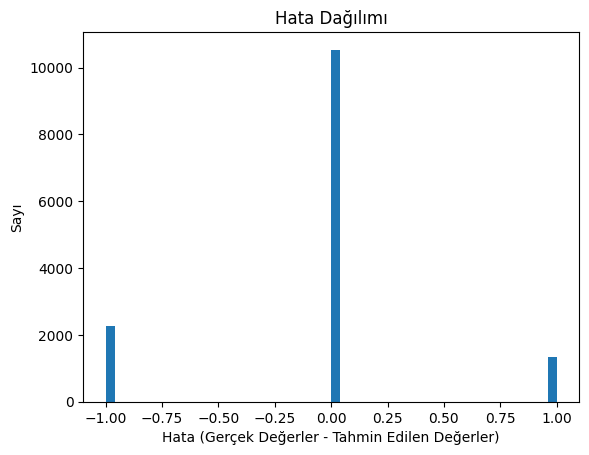

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

y_pred_probs = model.predict(X_test_scaled)
y_pred = (y_pred_probs > 0.5).astype(int)

errors = y_test - y_pred

plt.hist(errors, bins=50)
plt.xlabel("Hata (Gerçek Değerler - Tahmin Edilen Değerler)")
plt.ylabel("Sayı")
plt.title("Hata Dağılımı")
plt.show()
